In [2]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv(r'C:\Users\BD\Documents\Project\Stock-price-predicition-master\csv files\archive\LT_1.csv', index_col=False)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/30/2015,LT,EQ,1723.90,1728.60,1740.80,1683.35,1705.00,1700.55,1711.57,1521663,2.604440e+14,81643,741882,0.4875
1,2/2/2015,LT,EQ,1700.55,1696.00,1739.85,1696.00,1735.00,1735.10,1724.51,1417138,2.443860e+14,64092,741054,0.5229
2,2/3/2015,LT,EQ,1735.10,1742.00,1749.90,1707.35,1715.50,1722.50,1727.28,1953815,3.374790e+14,77892,1054659,0.5398
3,2/4/2015,LT,EQ,1722.50,1729.55,1732.20,1682.40,1684.10,1688.40,1707.00,1230675,2.100760e+14,53134,616978,0.5013
4,2/5/2015,LT,EQ,1688.40,1690.95,1706.00,1674.10,1678.50,1682.40,1691.81,1343965,2.273730e+14,51507,550677,0.4097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,4/26/2021,LT,EQ,1322.90,1330.05,1341.20,1323.00,1339.00,1335.90,1334.93,1431562,1.911040e+14,52965,518221,0.3620
1542,4/27/2021,LT,EQ,1335.90,1339.00,1388.45,1335.90,1384.00,1380.65,1370.45,4303909,5.898290e+14,128988,1899385,0.4413
1543,4/28/2021,LT,EQ,1380.65,1384.85,1399.95,1372.50,1374.15,1375.90,1383.54,3220346,4.455490e+14,88395,1638109,0.5087
1544,4/29/2021,LT,EQ,1375.90,1383.95,1389.55,1353.50,1358.80,1358.65,1366.40,2221346,3.035240e+14,71953,1070434,0.4819


In [35]:
df.shape

(1546, 15)

In [36]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

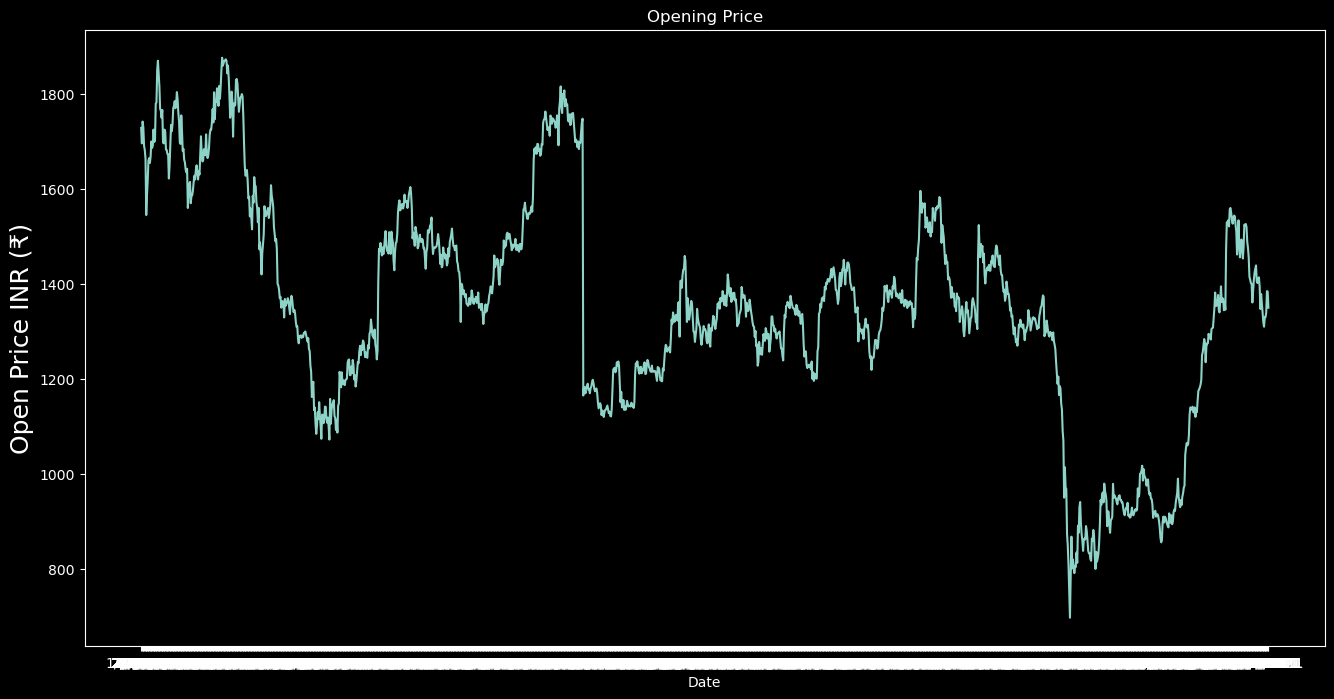

In [38]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Open Price INR (₹)', fontsize=18)
plt.show()

In [39]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1237

In [40]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [41]:
train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.87466079, 0.84701493, 0.88602442, 0.87546642, 0.84273236,
       0.83514247, 0.81928426, 0.71904681, 0.75457938, 0.78086839,
       0.81648575, 0.82072592, 0.81207598, 0.82394844, 0.85040706,
       0.83891621, 0.84315638, 0.87160787, 0.84955902, 0.85278155,
       0.91824966, 0.91994573, 0.97761194, 0.99457259, 0.97103969,
       0.94979647, 0.9089213 , 0.90540197, 0.89280868, 0.90663161,
       0.84871099, 0.84701493, 0.87165027, 0.86825814, 0.83616011,
       0.83539688, 0.82797659, 0.82751018, 0.78426052, 0.80809023,
       0.84192673, 0.8801306 , 0.86876696, 0.88140265, 0.90998134,
       0.91392469, 0.92248982, 0.90976934, 0.91846167, 0.93860244,
       0.92503392, 0.90137381, 0.88593962, 0.84871099, 0.84599729,
       0.89704885, 0.86906377, 0.833404  , 0.83726255, 0.81784261])]
[0.8129240162822251]



In [42]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1177, 60, 1)

In [44]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [45]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
1177/1177 [==============================] - 58s 36ms/step - loss: 0.0042
Epoch 2/3
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0020
Epoch 3/3
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0013


In [47]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [48]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [49]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

10/10 [==============================] - 3s 35ms/step


In [51]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

20.02815044119135

In [52]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

C:\Users\BD\AppData\Local\Temp\ipykernel_13280\2500192758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


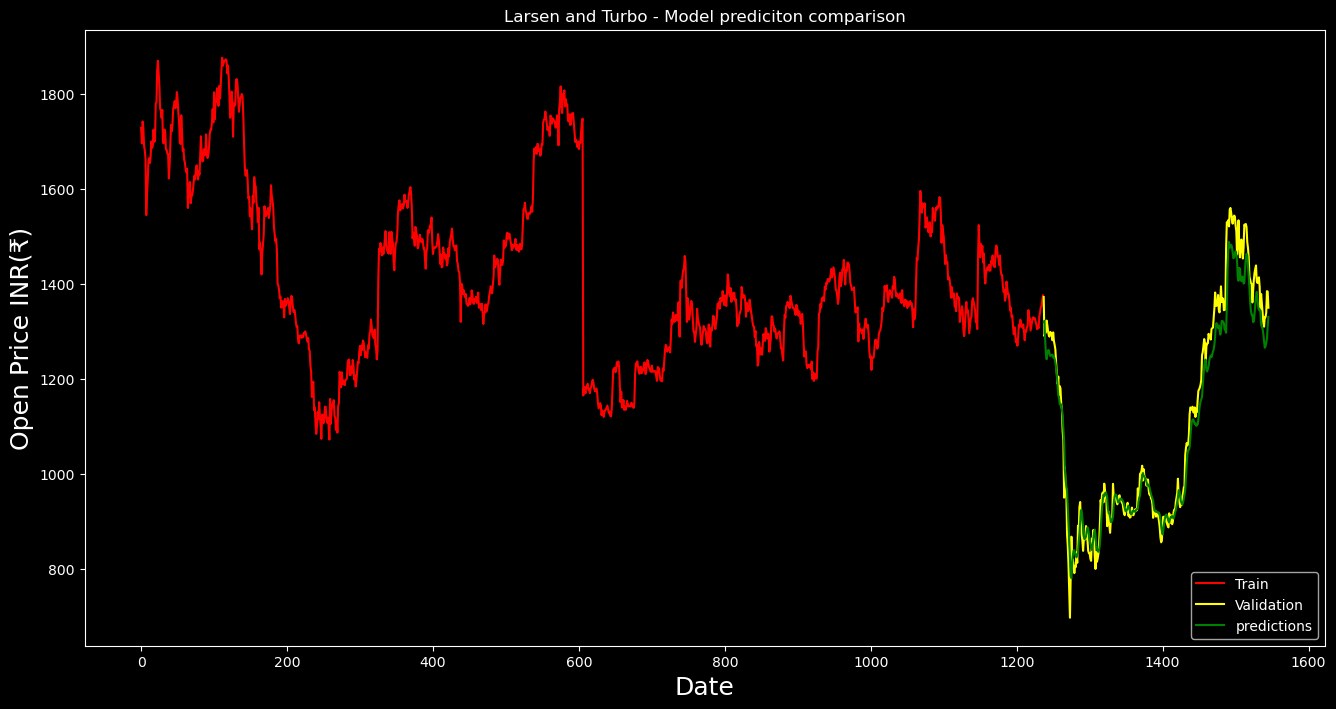

In [55]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Larsen and Turbo - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price INR(₹)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig(r'C:\Users\BD\Documents\Project\Stock-price-predicition-master/Images/prediction.png')
plt.show()

In [56]:
valid.tail(15)

,Open,predictions
1531,1410.00,1352.073730
1532,1414.00,1345.593628
1533,1393.95,1346.949951
1534,1347.25,1340.646851
1535,1378.95,1313.765503
1536,1360.50,1309.612305
1537,1340.00,1305.545288
1538,1320.00,1295.019409
1539,1310.00,1279.319824
1540,1330.00,1265.645996


In [58]:
#Get the quote
stock_quote = pd.read_csv(r'C:\Users\BD\Documents\Project\Stock-price-predicition-master\csv files\archive\LT_1.csv', index_col=False)

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of LT tomorrow:{pred_price}')

1/1 [==============================] - 0s 62ms/step
Opening Price of LT tomorrow:[[1321.8085]]
